### BASIC INFORMATION OF RESTAURANT INSPECTION

#### GRADING SYSTEM
- 0-13 Points = "A"
- 14-27 Points = "B"
- 28+ Points = "C"

####  GRADING SYSTEM INFOGRPAHIC

[![https://gyazo.com/8b3e6b15453628fc15a8dc9d12563e72](https://i.gyazo.com/8b3e6b15453628fc15a8dc9d12563e72.png)](https://gyazo.com/8b3e6b15453628fc15a8dc9d12563e72)


#### WHAT DOES IT TAKE - CRITICAL VIOLATIONS
[accoring to the playbook]
- Food Temperatures
    - Improper Cooking is a 10 or 28 point violation only. 10 points if they find it; 28 if it is not Corrected During the Inspection
    - Improper Hot Holding 5-8 points based on the number of foods in violation
    - Cold holding above 41°F for most foods includes garlic in oil, or above 38°F for ROP foods and smoked fish
    - Foods prepared from ambient ingredients below 41°F in 4 hours or less
- Food Sources
    - Dirty or cracked eggs, ranging from 1-25 by groups of 6, points of 7-28
- Food Protection
    - Three compartment sinks will be needed in all facilities
    - Closed drink containers are not allowed to contaminate the food stream.
    - Wet cloths in sanitizer at the proper concentration and test strips are available
    - Presence of vectors and evidence of vectors in varying degrees ranging from 5-28 points
- Facility Design
    - Overhead dust and dirt that could contaminate foods
    - Sneeze guards, wrapped portioned products
    - Proper thermometers or thermocouples
    - Food contact surfaces constructed, located or unacceptable materials
    - Food contact surfaces are to be WASHED RINSED and SANITIZED in place after each use
- Personal Hygiene
    - Ill employees will be worth 10 points and failure to remove them will result in 28 points
    - All employees working with ready to eat foods are using gloves
    - Improper hand washing
    

In [9]:
from matplotlib import rcParams

params = {
   'axes.labelsize': 10,
   'text.fontsize': 10,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [10, 8] # instead of 4.5, 4.5
   }
rcParams.update(params)

C:\Users\Public\anaconda3\envs\mlcv35\lib\site-packages\matplotlib\__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [58]:
original_data = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', parse_dates=['GRADE DATE', 'RECORD DATE'])

In [60]:
original_data.columns.values

array(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'], dtype=object)

In [65]:
target = original_data.sort_values(by='RECORD DATE', ascending=False)
target = target.set_index('CAMIS')
target = target[~(target.index.duplicated(keep='first'))]


In [91]:
!pwd

C:\Users\Henry Lin\Documents\cusp_2016\mlccc-bayesian-boners


In [92]:
target.to_csv('data/clean_bz.csv', encoding='utf-8')

In [67]:
target['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection                          13808
Cycle Inspection / Re-inspection                                4447
Pre-permit (Operational) / Initial Inspection                   3807
Pre-permit (Operational) / Re-inspection                         976
Pre-permit (Non-operational) / Initial Inspection                687
Administrative Miscellaneous / Initial Inspection                519
Smoke-Free Air Act / Initial Inspection                          272
Trans Fat / Initial Inspection                                   199
Cycle Inspection / Reopening Inspection                          120
Administrative Miscellaneous / Re-inspection                     119
Trans Fat / Re-inspection                                         82
Smoke-Free Air Act / Re-inspection                                79
Pre-permit (Operational) / Compliance Inspection                  47
Cycle Inspection / Compliance Inspection                          45
Inter-Agency Task Force / Initial 

In [69]:
target['INSPECTION_WHY'], target['INSPECTION_WHEN'] = target['INSPECTION TYPE'].str.split(' / ', 1).str

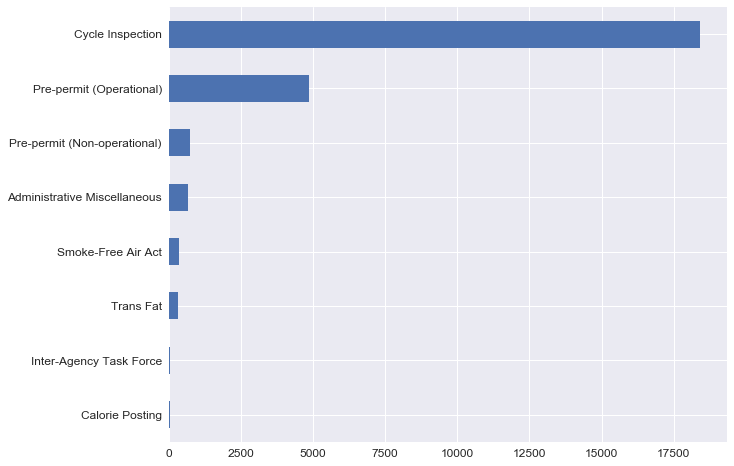

In [70]:
target['INSPECTION_WHY'].value_counts().sort_values(ascending=True).plot(kind='barh')

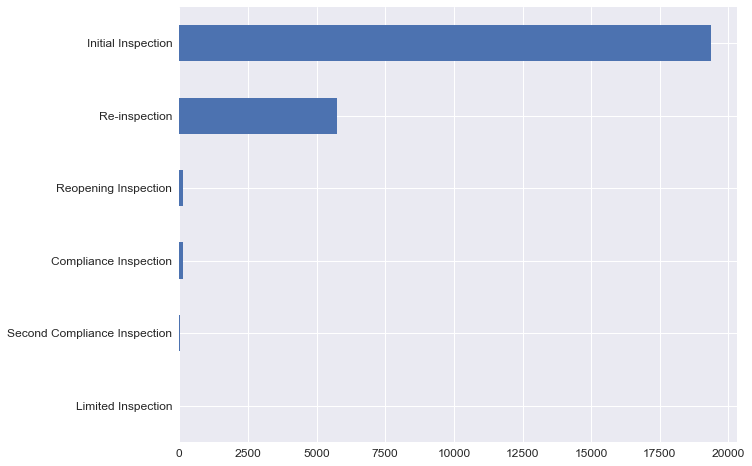

In [71]:
target['INSPECTION_WHEN'].value_counts().sort_values(ascending=True).plot(kind='barh')

## Summary of  violation code

For more informationm, you can take a look at the definition of each violation code.
[Blue Book](http://www1.nyc.gov/assets/doh/downloads/pdf/rii/blue-book.pdf)


In [12]:
ciritical = ['02C', '02D', '02E', '02F', '02I', 
             '04I', '04J', '03G', '04A','04K',
            '04L', '04M', '04N', '04O','05C', '05D',
            '05D', '05E', '05F','05G', '05H', '05I',
            '06A', '06B', '06C', '06D', '06E', '06F', '06H',
             '06I', '07A']

public_hazzard = ['02A', '02G', '02B', '02H', '03A',
                  '03B', '03C', '03D', '03E',
                  '02J', '04B', '04C', '04D',
                 '04E', '04F','04G', '04H', '05A', '05B', '06G']

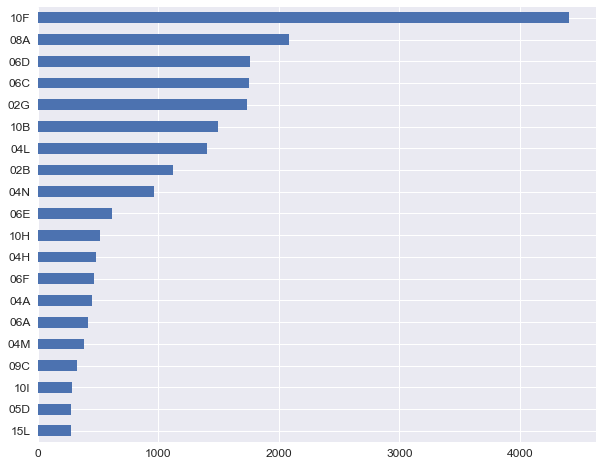

In [72]:
target['VIOLATION CODE'].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')

In [14]:
def violation(x):
    
    """
    
    transform violation code to three conditions:
    Critical, general and public_hazzard
    
    """
    
    
    critical = ['02C', '02D', '02E', '02F', '02I', 
             '04I', '04J', '03G', '04A','04K',
            '04L', '04M', '04N', '04O','05C', '05D',
            '05D', '05E', '05F','05G', '05H', '05I',
            '06A', '06B', '06C', '06D', '06E', '06F', '06H',
             '06I', '07A']

    public_hazzard = ['02A', '02G', '02B', '02H', '03A',
                  '03B', '03C', '03D', '03E',
                  '02J', '04B', '04C', '04D',
                 '04E', '04F','04G', '04H', '05A', '05B', '06G']
    
    if x in critical:
        return 'critical'
    elif x in public_hazzard:
        return 'public_hazzard'
    else:
        return 'general'
    

In [74]:
target['major_condition'] = target['VIOLATION CODE'].apply(str).apply(violation)

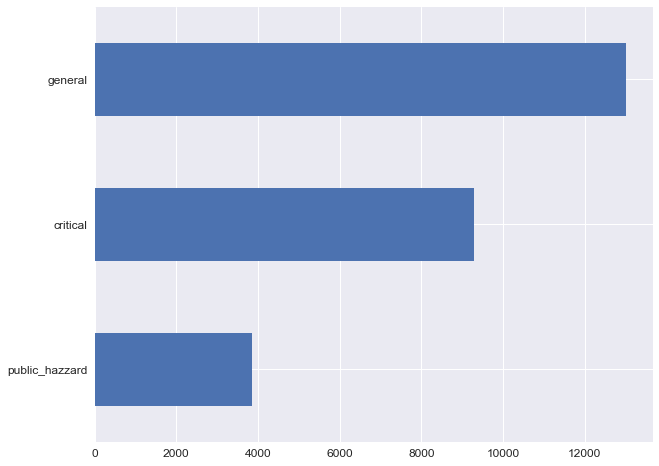

In [75]:
target['major_condition'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

### Public hazzard

inital inspection ====> public hazzard ==> closed
Re inspection  ====> public hazzard ==> closed

In [76]:
selected = target[target['major_condition'] == 'public_hazzard']

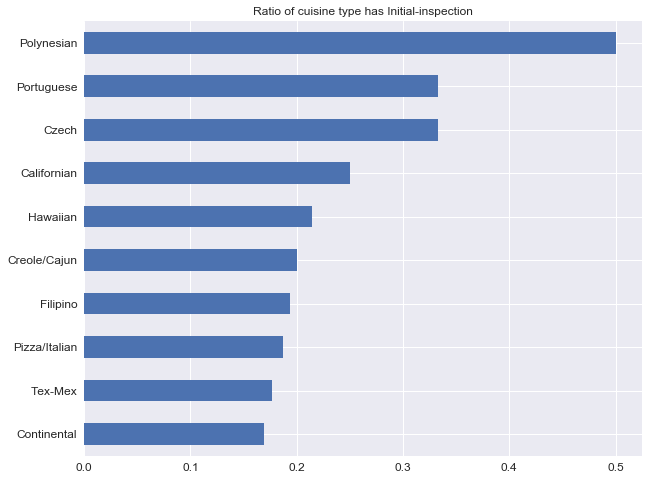

In [89]:
selected_initial = selected[selected['INSPECTION_WHEN'] == 'Initial Inspection']

ratio = selected_initial['CUISINE DESCRIPTION'].value_counts() / target['CUISINE DESCRIPTION'].value_counts() 
ratio.dropna().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Ratio of cuisine type has Initial-inspection')
plt.show()

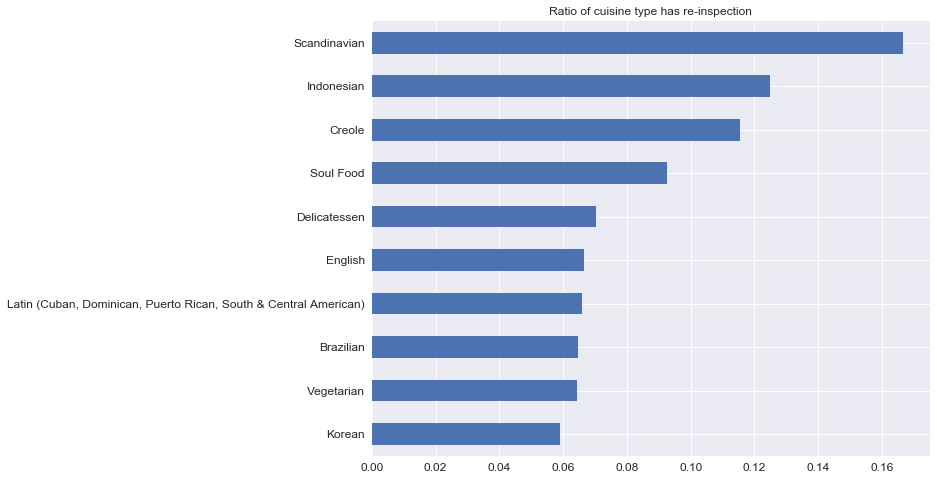

In [88]:
selected_re = selected[selected['INSPECTION_WHEN'] == 'Re-inspection']

ratio_re = selected_re['CUISINE DESCRIPTION'].value_counts() / target['CUISINE DESCRIPTION'].value_counts()
ratio_re.dropna().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Ratio of cuisine type has re-inspection')
plt.show()

In [82]:
result = target.ix[CAMIS]
CAMIS_list = result[result.SCORE > 14]

In [86]:
CAMIS_list['GRADE'].value_counts()

B                 1056
C                  211
Not Yet Graded     130
Z                   85
A                    3
P                    2
Name: GRADE, dtype: int64

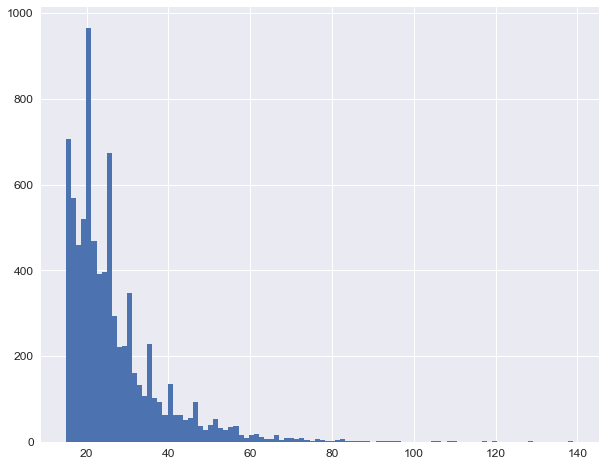

In [87]:
CAMIS_list['SCORE'].hist(bins=100)